<h1><center>Exercise 8</center></h1>
<h2><center>Video manipulation on jupyter notebook y motion detection</center></h2>

The objetive of this exercise is to be an introduction to video in OpenCV and Python and to demonstrate basic motion detection algorithms. For the first part of the exercisewe will be using the video sequence 'shopping_center.mpg' and for the motion section the images 'foreman69.png' and foreman70.png'and the functions in 'motionalgorithms.py'. 
To display video we will be using a new library: bokeh which allows the reproduction of video inside the notebook. It's also recommended to have an external video player, preferably VLC.

In [1]:
import numpy as np
import cv2
import motionalgorithms as ma
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import time
from matplotlib import pyplot as plt
output_notebook()
%matplotlib notebook


Loading BokehJS ...

**I. Basic video functions**

To start working with video in OpenCV first we need to create a video capture object using the function [cv2.videoCapture](https://docs.opencv.org/master/d8/dfe/classcv_1_1VideoCapture.html#a57c0e81e83e60f36c83027dc2a188e80). This function allows the user to either capture video directly from a camera connected to the computer, or open video files. In this case we will be using the video 'shopping_center.mpg' as an example.

First you create the video capture object calling the function, then use the method videoCapture.read which returns two variables, the first one is a boolean value indicating if the frame has been read correctly, the second is the frame as a numpy matrix. That gets you the first frame of the video. To read the rest you must use a while loop. [Here is an example](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html).

It's important to remeber that the video capture object must be released once all frames have been read using the method [release](https://docs.opencv.org/master/d8/dfe/classcv_1_1VideoCapture.html#afb4ab689e553ba2c8f0fec41b9344ae6).

Try storing all the frames in the video 'shopping_center.mpg' in a list called frames. If done right this list will have a length of 560 frames and all its items will be uint8 matrices.



In [2]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,image = vidcap.read()
count = 0
frames = []
while success:
  frames.append(image)     # save frame as JPEG file      
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1
vidcap.release()

print(len(frames))

560


Now we can find some of the video properties. First open again the video with videoCapture. To know the number of frames we can just chack the length of the array from the last point, but for some other characteristics you will need the method [get](https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d) from video capture.

Use this method to learn the framerate of the video and theheight and width of each frame.
Remember to close the video file afterwards.


In [3]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
print('numero de frames: ' + str(len(frames)))
print('ancho de cada frame: ' + str(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('alto de cada frame: ' + str(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frames per second: ' + str(vidcap.get(cv2.CAP_PROP_FPS)))
vidcap.release()

numero de frames: 560
ancho de cada frame: 384.0
alto de cada frame: 288.0
frames per second: 25.0


Primer frame

Now take the first frame of the video and save it in a new variable. Get its data type, size and shape and represent it using Matplotlib.

uint8
331776
(288, 384, 3)


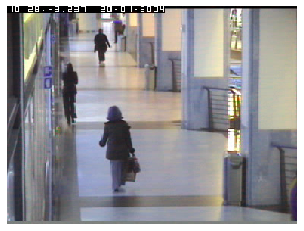

In [4]:
frame1 = frames[0]

print(frame1.dtype)
print(frame1.size)
print(frame1.shape)

frame=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
plt.figure('Primer Frame')
plt.imshow(frame1, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

To play the video inside the notebook we will be uisng the library [bokeh](https://docs.bokeh.org/en/latest/index.html).
This libraru has a few quirks, first it reads the images in adifferent directionso to correctly play the video all frames have to be flipped. The second quirk is the color space, it uses RGBA.

The next cell showa how to play videos using videocapture and bokeh.

In [5]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,frame = vidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)    
vidcap.release()    

looking at the code above identify where the frame rate to correctly play the video is specified and change it to play the video with a frame rate of 35fps.

In [17]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,frame = vidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/35)    
vidcap.release() 

Changing individual frames.

Extrat the 11th frame of the original video and apply an averaging filter with a kernel of size 5 over it. Display this new image next to the old one.

<IPython.core.display.Javascript object>


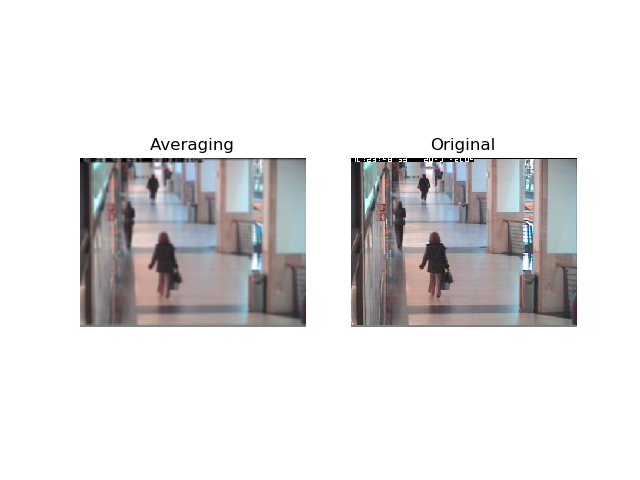

In [19]:
#filtro de media en uno
kernel = np.ones((5,5),np.float32)/25
new10 = cv2.filter2D(frames[10],-1,kernel)

new10rgb=cv2.cvtColor(new10, cv2.COLOR_BGR2RGB)
old10=cv2.cvtColor(frames[10], cv2.COLOR_BGR2RGB)

plt.figure('filtro de media')
plt.subplot(121),plt.imshow(new10rgb, vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(old10, vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Now take another frame and get its negative. Again display both frames.

<IPython.core.display.Javascript object>


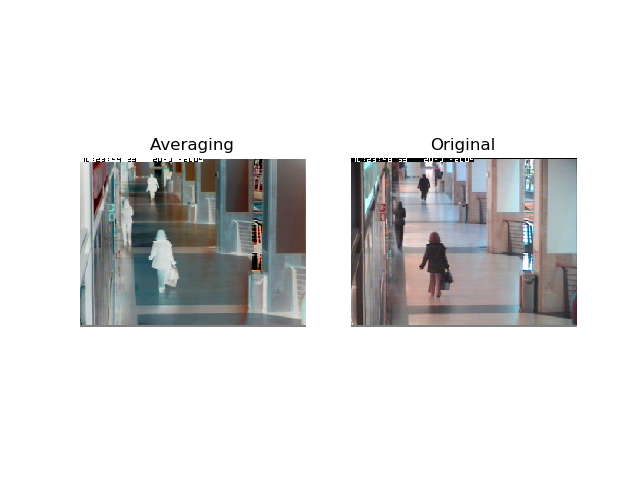

In [20]:
#negativo

new25 = 255-frames[25]

new25rgb=cv2.cvtColor(new25, cv2.COLOR_BGR2RGB)
old25=cv2.cvtColor(frames[25], cv2.COLOR_BGR2RGB)

plt.figure('negativo')
plt.subplot(121),plt.imshow(new25rgb, vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(old10, vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**Saving new video files**

Substitute the two new frames in the original array. We are going to save a new video structure usingthis new array and the function [cv2.videowriter](https://docs.opencv.org/3.4/dd/d9e/classcv_1_1VideoWriter.html#ad59c61d8881ba2b2da22cff5487465b5).

This function creates a video structure, the first argument of the function is the nema of the new file, the other arguments are the codification that's going to be used (cv2.VideoWriter_fourcc(\*'DIVX')), the frame rate of the video and the shape of the frames.

Once you have a video structure use a for loop iteration, push the frames in the array in the structure using the property write of the object videostructure. [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html) you can find an example on how to use videowriter.

In [21]:
#sustituir en el video 

frames[10] = new10
frames[25] = new25
height, width, layers = new25.shape
size = (width,height)

out = cv2.VideoWriter('newshopping.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(frames)):
    out.write(frames[i])
out.release()

Read and play the new video using bokeh.

In [23]:
#reproducir nuevo video

newvidcap = cv2.VideoCapture('newshopping.avi')
success,frame = newvidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p3 = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage3 = p3.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p3, notebook_handle=True)
cont = 0
while success:
    success,frame = newvidcap.read()
    if not success:
        newvidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage3.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)  
vidcap.release()  

Are the manipulated frames noticeable? Which one is more obvious?

Save a new video where all the frames are the negative of the original video. Play this new video.

In [29]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,image = vidcap.read()

count = 0
height, width, layers = image.shape
size = (width,height)

out = cv2.VideoWriter('negativeshopping.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

while success:
    image = 255-image
    out.write(image)
    success,image = vidcap.read()
    count += 1
vidcap.release()

In [30]:
#reproducir nuevo video

newvidcap = cv2.VideoCapture('negativeshopping.avi')
success,frame = newvidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p3 = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage3 = p3.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p3, notebook_handle=True)
cont = 0
while success:
    success,frame = newvidcap.read()
    if not success:
        newvidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage3.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)  
vidcap.release()   

**II.Block based motion stimation**
    **II.1 EBMA**
    
    
        EBMA is a block-matching gmotion stimation algorithm, it's used to compare two different frames and stimate a frame in between that might have been lost.
        
        Use the EBMA algorithm that comes in the file motionstimation algorithms to stimate the frame between the images 'foremanY69.png' and 'foremanY72.png'.
        
        This functions has 3 arguments,first and second are the anchor frame and the target frame, the last argument is the size of the block used in the algorithm.
        
        First display both frames side by side
    

<IPython.core.display.Javascript object>


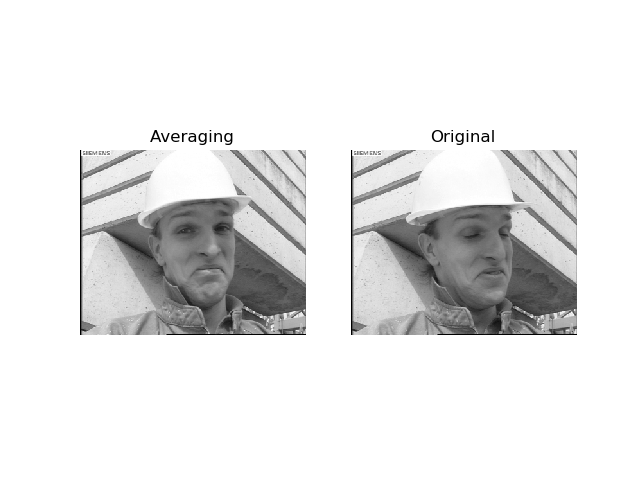

In [3]:
%matplotlib notebook

anchorframe = cv2.imread('foremanY69.png',0)
targetframe = cv2.imread('foremanY72.png',0)


plt.figure('Frames')
plt.subplot(121),plt.imshow(anchorframe, vmin = 0, vmax = 255, cmap = 'gray'),plt.title('Averaging')
plt.axis('off')
plt.subplot(122),plt.imshow(targetframe, vmin = 0, vmax = 255, cmap = 'gray'),plt.title('Original')
plt.axis('off')
plt.show()

Now predict a frame using EBMA and block size 16.
Calculate the mean squared error getting the absolute difference between the target frame and the predicted frame, square the results and get the mean value.

Display the predicted frame frame.

(288, 352)


<IPython.core.display.Javascript object>


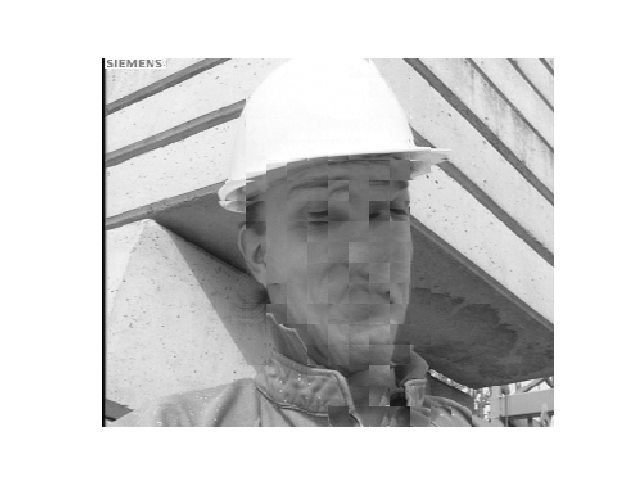

MSE EBMA 16: 147.80628551136363


In [7]:
ebma16, origin16, direction16= ma.EBMA(targetframe, anchorframe, 16)
plt.figure('foreman')
plt.imshow(ebma16, cmap='gray')
plt.axis('off')
plt.show()

errorFrame = abs(np.int32(anchorframe)-np.int32(ebma16))
errorFrame = errorFrame**2
EBMA16_MSE = errorFrame.mean()
print("MSE EBMA 16: " + str(EBMA16_MSE))

Now we are going to represent with a quiver plot the movement vector returned by the fuction EBMA over the anchor image. In the cell below you can see the code as an example.

When displaying images the point 0,0 is automatically placed on the top left but for any otehr graph the origin is on the bottom to compensate for that we have to change the direction of the vectors on the Y axis.

<IPython.core.display.Javascript object>


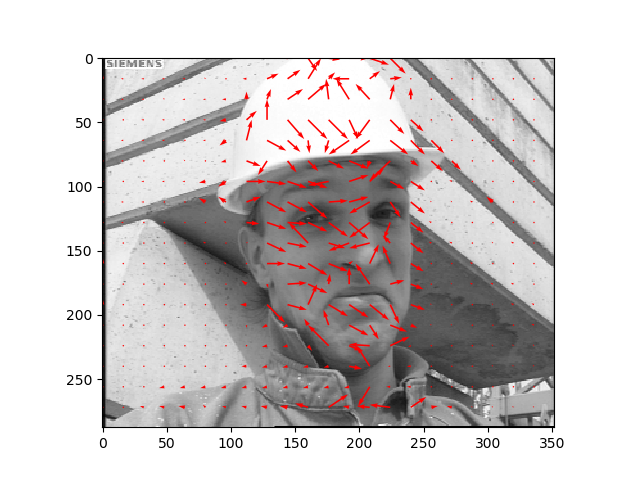

In [8]:
fig, ax =plt.subplots()
ax.imshow(anchorframe, cmap='gray')
ax.quiver(origin16[0], origin16[1], direction16[0], -direction16[1], color =[1,0,0, 1], width = 0.0035, scale_units='xy', scale=1)
plt.show()


Repeat the process with blocksize 32 and 8.

(288, 352)


<IPython.core.display.Javascript object>


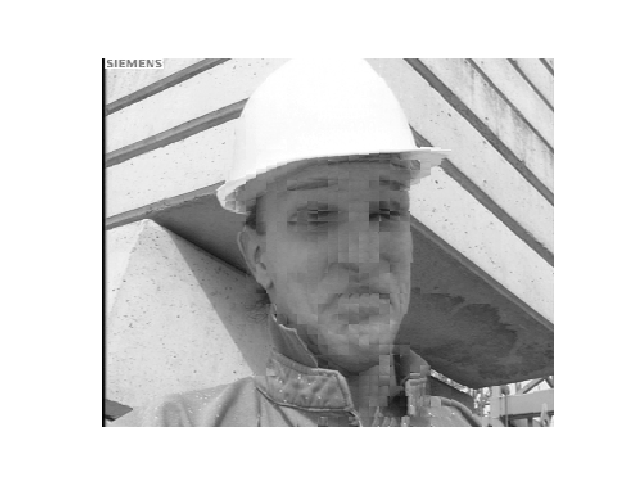

In [9]:
ebma8, origin, direction= ma.EBMA(targetframe, anchorframe, 8)
plt.figure('foreman8')
plt.imshow(ebma8, cmap='gray')
plt.axis('off')
plt.show()


(288, 352)


<IPython.core.display.Javascript object>


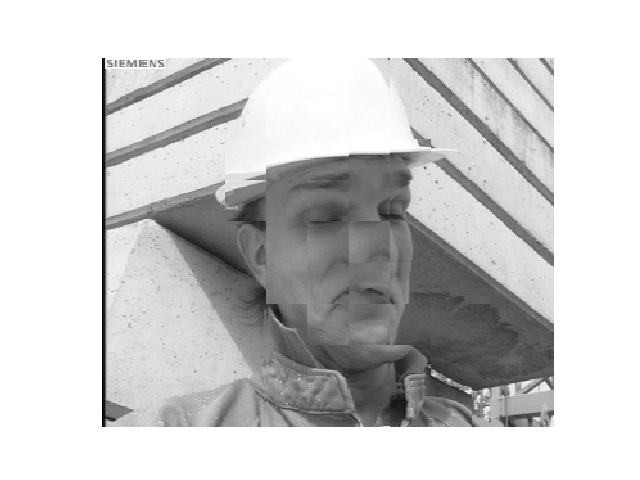

In [10]:
ebma32, origin32, direction32= ma.EBMA(targetframe, anchorframe, 32)
plt.figure('foreman32')
plt.imshow(ebma32, cmap='gray')
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>


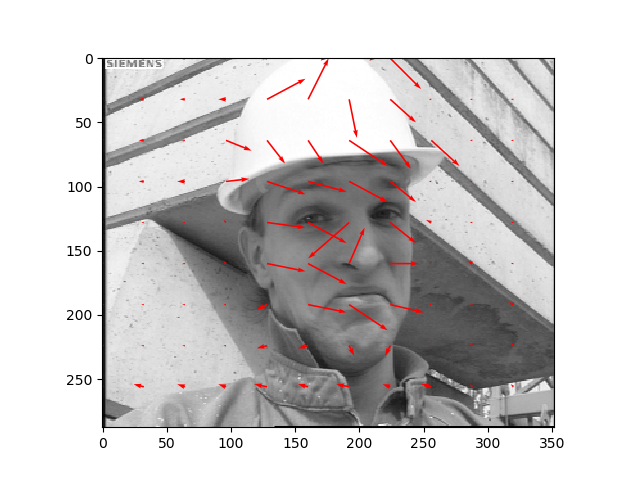

In [16]:
figarrow1, ax =plt.subplots()
ax.imshow(anchorframe, cmap='gray')
ax.quiver(origin32[0], origin32[1], direction32[0], -direction32[1], color =[1,0,0, 1], width = 0.0035, scale_units='xy', scale=0.5)
plt.show()

<IPython.core.display.Javascript object>


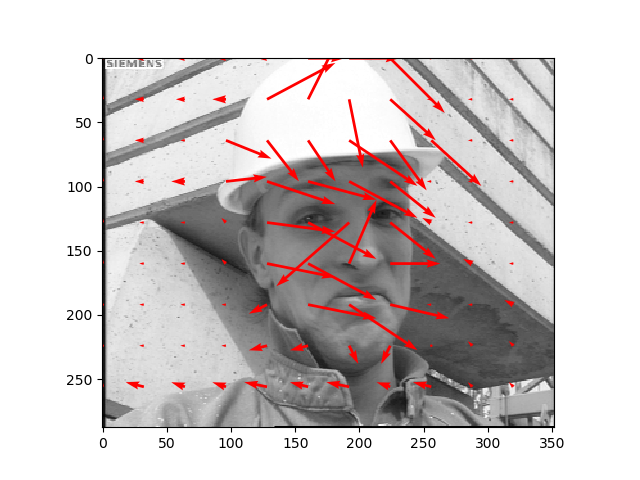

In [12]:
figarrow2, ax =plt.subplots()
ax.imshow(anchorframe, cmap='gray')
ax.quiver(origin32[0], origin32[1], direction32[0], -direction32[1], color =[1,0,0, 1])
plt.show()

Now we will be using a different algorithm [HBMA](http://www.newmediarepublic.com/dvideo/compression/adv20.html#:~:text=Hierarchical%20block%20matching%20techniques%20attempt,with%20those%20of%20small%20blocks.&text=Hierarchical%20block%20matching%20algorithms%20exploit,for%20searches%20for%20small%20blocks.) that stands for Hierarchical block mathing, it works in a similar way to EBMA but it's optimize to only check areas of great difference by using varying block sizes when searching.

This function is very similar to the last one but it need one more input: L the number of levels.

Get a prediction frame with the same target and anchor images, blocksize 16 and 3 levels.As in the last one calculate the MSE and draw the movement vectors.

The last prediction algorithm for this exercise is [Phase correlation](https://en.wikipedia.org/wiki/Phase_correlation)

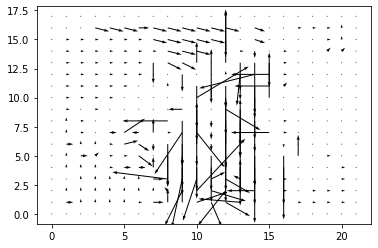

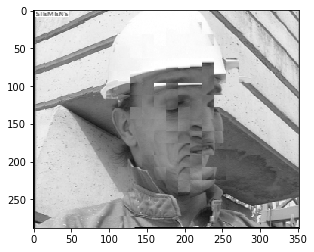

In [12]:
ma.PhaseCorrelation(targetframe, anchorframe)